<a href="https://colab.research.google.com/github/Saifullah785/deep-learning-practice/blob/main/ones_initialization_relu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [39]:
df = pd.read_csv('/content/drive/MyDrive/concertriccir2.csv')

In [40]:
df.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


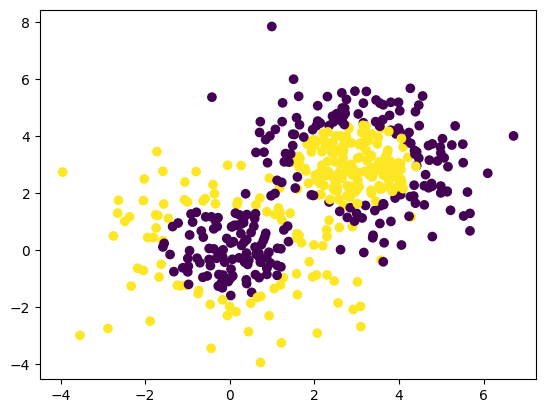

In [41]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [42]:
x = df.iloc[:,0:2].values
y = df.iloc[:, -1].values

In [43]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense



In [44]:
# model = Sequential()
# model.add(Dense(2, activation='relu', input_dim=2))
# model.add(Dense(1, activation='sigmoid'))

# model.summary()

model = Sequential()
model.add(Dense(2, activation='tanh', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [45]:
# Set parameters to 0
model.get_weights()

[array([[ 0.702736  ,  1.215737  ],
        [-0.28227127, -0.9863741 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.0205988 ],
        [ 0.08279061]], dtype=float32),
 array([0.], dtype=float32)]

In [46]:
initial_weights = model.get_weights()


In [47]:
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
model.set_weights(initial_weights)

In [50]:
model.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [51]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [52]:
history = model.fit(x,y, epochs=100, validation_split=0.2)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4829 - loss: 0.8462 - val_accuracy: 0.4300 - val_loss: 1.0360
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4940 - loss: 0.8194 - val_accuracy: 0.4300 - val_loss: 1.0221
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5231 - loss: 0.8117 - val_accuracy: 0.4300 - val_loss: 1.0082
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4794 - loss: 0.8354 - val_accuracy: 0.4300 - val_loss: 0.9948
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4494 - loss: 0.8266 - val_accuracy: 0.4300 - val_loss: 0.9818
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4800 - loss: 0.7912 - val_accuracy: 0.4300 - val_loss: 0.9696
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4520 - loss: 0.8255 - val_accuracy: 0.4300 - val_loss: 0.9573
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4488 - loss: 0.8176 - val_accuracy: 0.4300 

In [53]:
model.get_weights()

[array([[0.36157164, 0.36157164],
        [0.47455683, 0.47455683]], dtype=float32),
 array([-0.01107685, -0.01107685], dtype=float32),
 array([[0.09741281],
        [0.09741281]], dtype=float32),
 array([0.00634202], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


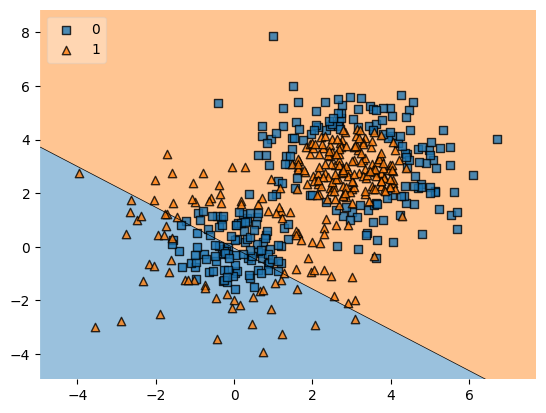

In [54]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x, y.astype('int') ,clf=model, legend=2)
plt.show()